# Training a Graph Neural Cellular Automata (GNCA) with Measurement Data
This notebook demonstrates how to load measurement data, set up the environment and GNCA model, and train the model using the provided measurements.

In [79]:
import numpy as np
import torch
from environment import Environment
from custon_nca import CustomGNN
import matplotlib.pyplot as plt

In [80]:

positions = []

data = []

path = "../data/gastruloid/"

name = "moredecay"
for i in range(10):
    positions.append(np.load(path + f"{name}{i}_positions.npy"))
    SMAD_ERK = np.load(path + f"{name}{i}_SMAD_and_ERK.npy")
    BMP = np.load(path + f"{name}{i}_BMP_levels.npy")
    FGF = np.load(path + f"{name}{i}_FGF_levels.npy")
    SMAD_ERK = SMAD_ERK.swapaxes(1, 2)
    BMP_FGF = np.concatenate((BMP[:,:,None], FGF[:,:,None]), axis=2)

    # SMAD_ERK[:,:,0] *= 100.
    # SMAD_ERK[:,:,1] *= 100.

    # d = SMAD_ERK[:201,:,:]
    d = BMP_FGF[:,:,:]

    # normalize the two channels independently
    d[:,:,0] = (d[:,:,0] - np.min(d[:,:,0])) / (np.max(d[:,:,0]) - np.min(d[:,:,0]))
    d[:,:,1] = (d[:,:,1] - np.min(d[:,:,1])) / (np.max(d[:,:,1]) - np.min(d[:,:,1]))
    data.append(d)
    # print(d.shape)


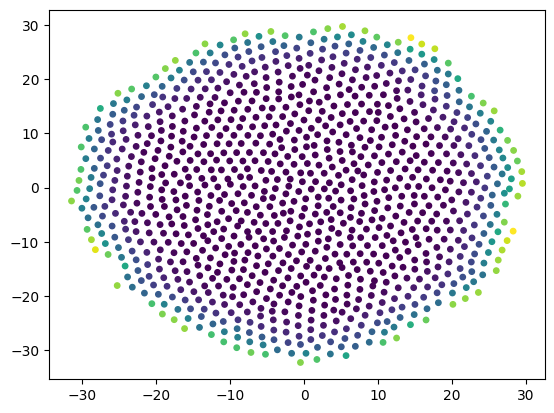

In [86]:
plt.scatter(positions[0][:,0], positions[0][:,1], c=usedata[0][0,:,1], cmap='viridis', s=15)

In [98]:
# data = [d[:,:,0] for d in data]
data = np.array(data)
print(data.shape)

(10, 20001, 1000, 2)


In [99]:
# usedata = np.moveaxis(np.array([data[:,10,:,:], data[:,data.shape[1]//2,:,:], data[:,-1,:,:]]), 0,1)
usedata = np.moveaxis(np.array([data[:,10,:,:], data[:,20,:,:], data[:,30,:,:], data[:,40,:,:], data[:,50,:,:]]), 0,1)
print(usedata.shape)

(10, 5, 1000, 2)


In [ ]:
# makedir
import os
if not os.path.exists("models"):
    os.makedirs("models")

for i in range(5):
    model = CustomGNN(input_dims=2, hidden_dims=[16], output_dims=2, biases=True, aggregation = "mean")

    # Initialize environment and model*
    env = Environment(model, usedata, positions, lr = 1e-3, weight_gain=0.00001, diversity_gain=0., steps_per_data_point=10)

    env.train(1000, )

    torch.save(model.state_dict(), f"models/model_ELU{i}.pth")

(1000, 10) (1000, 10)
(1000, 8) (1000, 8)
(1000, 9) (1000, 9)
(1000, 10) (1000, 10)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 8) (1000, 8)
(1000, 9) (1000, 9)
10
CustomGNN | 0.005 loss: 36.67416423559189 | accuracy: 0.20814862847328186 | l1 weights: 0.0817980021238327 
20
CustomGNN | 0.01 loss: 28.81883643567562 | accuracy: 0.2246372103691101 | l1 weights: 0.08074891567230225 
30
CustomGNN | 0.015 loss: 23.416433483362198 | accuracy: 0.2090725600719452 | l1 weights: 0.08004264533519745 
40
CustomGNN | 0.02 loss: 19.819317385554314 | accuracy: 0.2206805944442749 | l1 weights: 0.07973390817642212 
50
CustomGNN | 0.025 loss: 17.175331711769104 | accuracy: 0.22081784904003143 | l1 weights: 0.07979808747768402 
60
CustomGNN | 0.03 loss: 15.064169652760029 | accuracy: 0.2283853441476822 | l1 weights: 0.08018556237220764 
70
CustomGNN | 0.035 loss: 13.289960101246834 | accuracy: 0.22548532485961914 | l1 weights: 0.0808478370308876 
80
CustomGNN | 0

KeyboardInterrupt: 

In [90]:
model = CustomGNN(input_dims=2, hidden_dims=[16], output_dims=2, biases=True, aggregation = "mean")

model.load_state_dict(torch.load("models/model_ELU1.pth"))

# env = Environment(model, usedata, positions, lr = 0.5*1e-2, weight_gain=0.000001, diversity_gain=0., steps_per_data_point=10)
env.set_model(model)

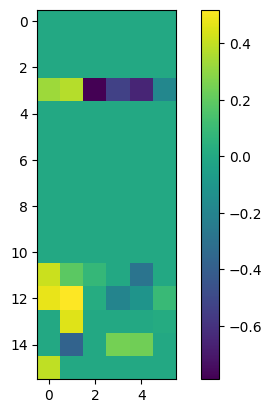

In [91]:
plt.imshow(model.get_weights()[0].detach())
plt.colorbar()

$$\bf{N}(\bf{u})=\begin{bmatrix} A(\bf{u}) \\ B(\bf{u})\end{bmatrix}$$

$$\frac{d\bf{N}(\bf{u})}{dt}=\begin{bmatrix} F_A(\bf{u}) \\ F_B(\bf{u})\end{bmatrix}$$

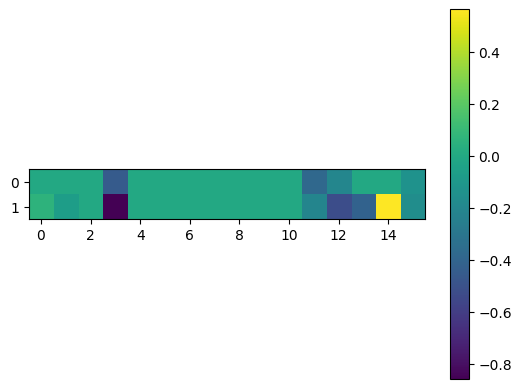

In [92]:
plt.imshow(model.get_weights()[1].detach())
plt.colorbar()

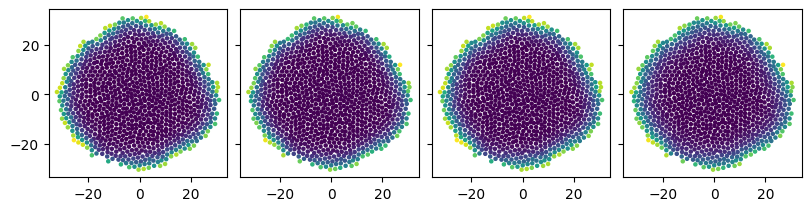

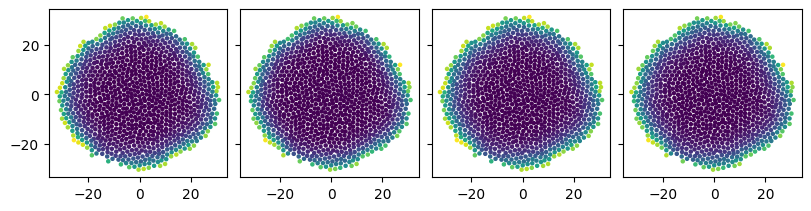

0.39279578626155853

In [93]:
env.test_quality(show = 3, guess_change= True)

In [11]:
env.ys[0][0].max(axis = 0)

torch.return_types.max(
values=tensor([0.7319, 0.9084]),
indices=tensor([914, 914]))

C:\Users\jakob\AppData\Local\Temp\ipykernel_26540\2366044768.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  border_mask = torch.tensor(border_mask, requires_grad=True, dtype=torch.float32)
C:\Users\jakob\AppData\Local\Temp\ipykernel_26540\2366044768.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs.append(torch.tensor(inp, dtype=torch.float32, requires_grad=True))


Jacobian shape: (2, 5, 1000)
Inputs shape: (3, 1000)


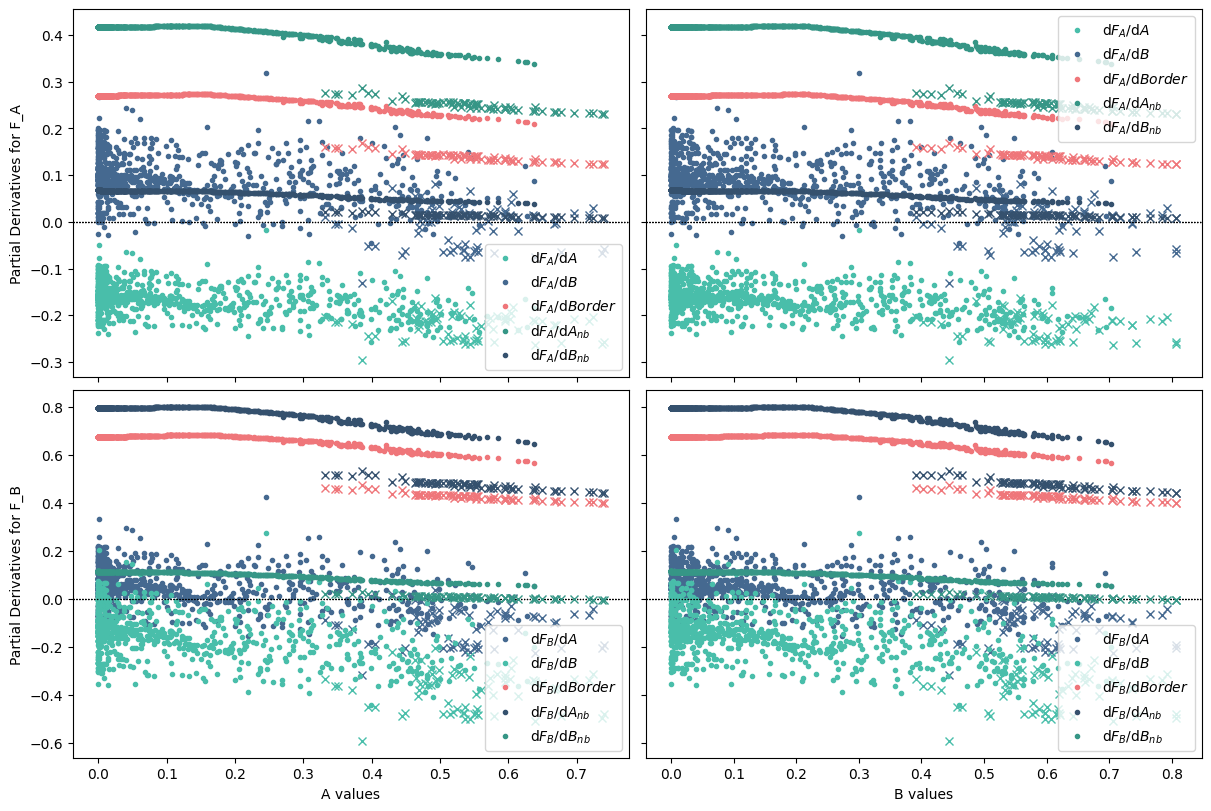

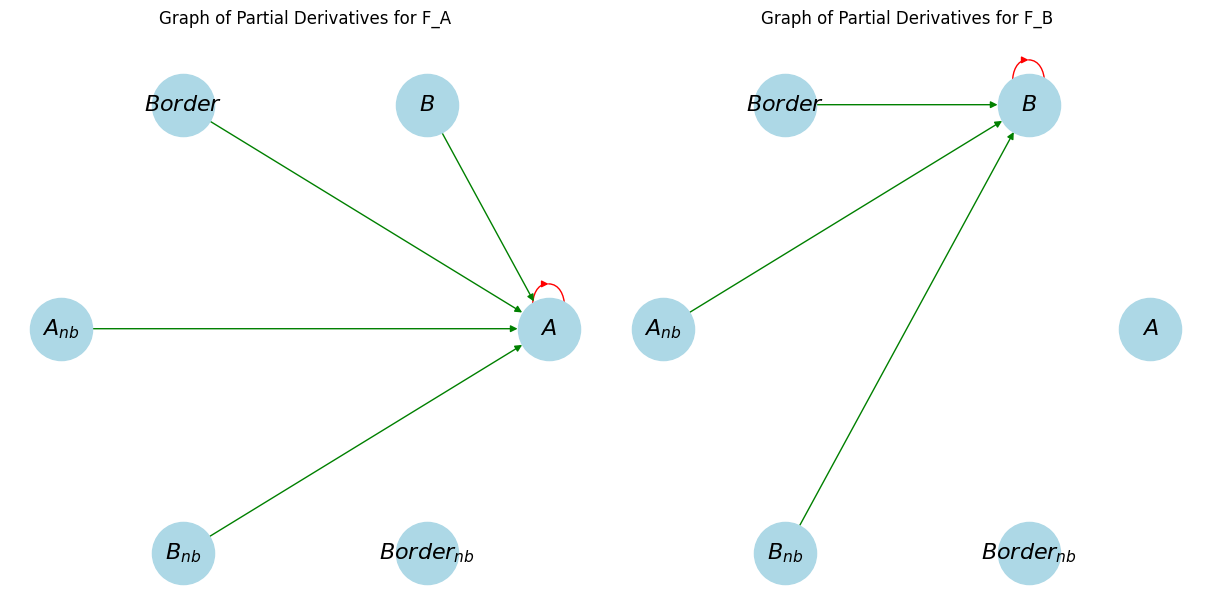

In [96]:
# Example: Compute gradients of model output w.r.t. different input vectors

# Let's assume you want to compute the gradient of the model's output with respect to its input.
# We'll use a sample input from usedata and convert it to a torch tensor with requires_grad=True.

def get_Jacobian_from_input(input_tensor, objective):
    Jacobian = []

    for obj_i in range(objective.shape[0]):
        dobj = []

        for inp in input_tensor:
            dobj_dinp = torch.autograd.grad(
                outputs=objective[obj_i],  # Summed to get a scalar output
                inputs=inp,
                create_graph=True,  # Create graph for higher-order gradients
                )[0].detach().numpy()
            
            dobj.append(np.array(dobj_dinp))
        Jacobian.append(dobj)

    return np.array(Jacobian)






def get_partial_derivatives(environment, dataset_n, timepoint=0, ):
    np_inputs = []
    inputs = []

    edges, edge_weights, border_mask = environment.edges[dataset_n], environment.edge_weights[dataset_n], environment.border_mask[dataset_n]
    border_mask = torch.tensor(border_mask, requires_grad=True, dtype=torch.float32)
    

    for i in range(environment.ys[dataset_n].shape[-1]):
        inp = environment.ys[dataset_n][timepoint,:,i]
        inputs.append(torch.tensor(inp, dtype=torch.float32, requires_grad=True))
    
    sample_input = torch.stack(inputs, dim=1)  # shape: (num_nodes, 2)

    sample_positions = torch.tensor(env.positions[dataset_n], dtype=torch.float32)  # shape: (num_nodes, 2)

    output, messages = env.call_own_model_and_return_messages(sample_input, edges, edge_weights, border_mask)

    if not messages:
        raise ValueError("No messages returned from the model. Check the model's forward method.")
    
    for msg in messages:
        msg = msg.requires_grad_()
        inputs.append(msg)  # Add messages as a new input tensor
        np_inputs.append(msg.detach().numpy())

    
    np_inputs = np.array(np_inputs)

    data = {"input" : np_inputs, "messages": messages, "positions": sample_positions.detach().numpy(), "output": output.detach().numpy(), "border_mask": border_mask.detach().numpy().astype(bool)}

    objective = (output).sum(dim = 0)

    Jacobian = get_Jacobian_from_input(inputs, objective)

    return Jacobian, data


def get_partial_derivatives_from_input_values(environment, dataset_n, timepoint=0, input_values = (0, 0), ):
    np_inputs = []
    inputs = []

    edges, edge_weights, border_mask = environment.edges[dataset_n], environment.edge_weights[dataset_n], environment.border_mask[dataset_n]
    border_mask = torch.tensor(border_mask, requires_grad=True, dtype=torch.float32)
    

    for i in range(environment.ys[dataset_n].shape[-1]):
        inp = environment.ys[dataset_n][timepoint,:,i]
        inp = torch.ones_like(inp) * input_values[i]  + np.random.normal(0, 0.01, inp.shape)  # Add some noise to the input


        inputs.append(torch.tensor(inp, dtype=torch.float32, requires_grad=True))
    
    sample_input = torch.stack(inputs, dim=1)  # shape: (num_nodes, 2)

    sample_positions = torch.tensor(env.positions[dataset_n], dtype=torch.float32)  # shape: (num_nodes, 2)

    output, messages = env.call_own_model_and_return_messages(sample_input, edges, edge_weights, border_mask)

    if not messages:
        raise ValueError("No messages returned from the model. Check the model's forward method.")
    
    for msg in messages:
        msg = msg.requires_grad_()
        inputs.append(msg)  # Add messages as a new input tensor
        np_inputs.append(msg.detach().numpy())

    
    np_inputs = np.array(np_inputs)

    data = {"input" : np_inputs, "messages": messages, "positions": sample_positions.detach().numpy(), "output": output.detach().numpy(), "border_mask": border_mask.detach().numpy().astype(bool)}

    objective = (output).sum(dim = 0)

    Jacobian = get_Jacobian_from_input(inputs, objective)

    return Jacobian, data



def visualize_Jacobian(Jacobian, data):
    inputs = data["input"]

    names = ["A", "B", "Border", "A_{nb}", "B_{nb}", "Border_{nb}"]
    function_names = ["F_A", "F_B"]

    print("Jacobian shape:", Jacobian.shape)
    print("Inputs shape:", inputs.shape)
    border_mask = data["border_mask"]


    colors1 = ['#49BEAA', '#456990', '#EF767A', '#369686', '#35516E', '#EA484E']
    colors2 = ['#456990', '#49BEAA',  '#EF767A', '#35516E', '#369686', '#EA484E']
    colors = [colors1, colors2]

    # make a 2x2 grid of plots
    fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex="col", sharey="row", constrained_layout=True)

    for AB_Jacobian in range(2):
        name = function_names[AB_Jacobian]
        for AB_ax_axis in range(2):
            for deriv_i in range(len(Jacobian[AB_Jacobian])):
                axs[AB_Jacobian, AB_ax_axis].axhline(0, color='black', linestyle=':', linewidth=0.8)
                name2 = names[deriv_i]
                deriv = Jacobian[AB_Jacobian][deriv_i]
                color = colors[AB_Jacobian][deriv_i]
                # Plot border and non-border with the same color and different markers
                axs[AB_Jacobian, AB_ax_axis].plot(inputs[AB_ax_axis][border_mask], deriv[border_mask], 'x', color=color, )
                axs[AB_Jacobian, AB_ax_axis].plot(inputs[AB_ax_axis][~border_mask], deriv[~border_mask], '.', color=color, label=f'd${name}$/d${name2}$')

                if AB_Jacobian != 0:
                    axs[AB_Jacobian, AB_ax_axis].set_xlabel(f'{names[AB_ax_axis]} values')
                if AB_ax_axis == 0:
                    axs[AB_Jacobian, AB_ax_axis].set_ylabel('Partial Derivatives for ' + name)
                axs[AB_Jacobian, AB_ax_axis].legend()

                # draw line at y=0


    plt.show()

# import graph drawing library
import networkx as nx

def make_graph(Jacobian, data):

    inputs = data["input"]

    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True, constrained_layout=True)
    axs[0].set_title("Partial Derivatives of F_A")
    axs[1].set_title("Partial Derivatives of F_B")
    for input_i in range(2):
        G = nx.DiGraph()

        border_mask = data["border_mask"]
        names = ["A", "B", "Border", "A_{nb}", "B_{nb}", "Border_{nb}"]
        names = ["$"+n+"$" for n in names]

        function_names = ["F_A", "F_B"]

        # make nodes for each name
        nodes = []
        for name in names:
            nodes.append(name)
            G.add_node(name)


        for deriv_i in range(len(Jacobian[input_i])):
            deriv = Jacobian[input_i][deriv_i][~border_mask]
            if np.mean(deriv > 0)>0.9:
                G.add_edge(names[deriv_i], names[input_i], color='green')


            if np.mean(deriv < 0)>0.9:
                G.add_edge(names[deriv_i], names[input_i], color='red')
            
            # print(names[deriv_i], np.mean(deriv > 0), np.mean(deriv < 0), np.mean(deriv == 0))
        # plot 
        # pos = nx.spring_layout(G, seed=42)  # positions for all nodes
        pos = nx.circular_layout(G)  # positions for all nodes
        edges = G.edges()
        # print("Edges:", edges)
        colors = [G[u][v]['color'] for u, v in edges]
        nx.draw(G, pos, with_labels=True, edge_color=colors, node_color='lightblue', node_size=2000, font_size=16, font_color='black', arrows =True, ax = axs[input_i])
        axs[input_i].set_title("Graph of Partial Derivatives for" f" {function_names[input_i]}")
    plt.show()


def get_jacobian_and_visualize(env, dataset_n = 1, timepoint=2,):
    """
    Get the Jacobian and visualize it.
    """
    Jacobian, data = get_partial_derivatives(env, dataset_n, timepoint,)
    visualize_Jacobian(Jacobian, data)
    make_graph(Jacobian, data)

def get_jacobian_and_visualize_from_input_values(env, dataset_n = 0, timepoint=0, input_values = (0, 0),):
    """
    Get the Jacobian and visualize it.
    """
    Jacobian, data = get_partial_derivatives_from_input_values(env, dataset_n, timepoint, input_values)
    visualize_Jacobian(Jacobian, data)
    make_graph(Jacobian, data)

def get_jacobian_from_sweep(env, dataset_n = 0, timepoint=0):

    for input_values in np.linspace(0, 1, 10):
        print("Input values:", input_values)
        Jacobian, data = get_partial_derivatives_from_input_values(env, dataset_n, timepoint, (input_values, 1-input_values))
        visualize_Jacobian(Jacobian, data)
        make_graph(Jacobian, data)


get_jacobian_and_visualize(env, dataset_n = 0, timepoint=2,)

# get_jacobian_from_sweep(env, dataset_n = 0, timepoint=0,)

In [56]:
Jacobian[:,:2].T.shape

determinat = np.linalg.det(Jacobian[:,:2].T)

plt.hist(determinat, bins=50, alpha=0.9, label='Determinant of Jacobian', density=False)
plt.yscale('log')
plt.xlabel('Determinant of Jacobian')
plt.ylabel('Frequency')
plt.legend()

NameError: name 'Jacobian' is not defined

In [76]:
env = Environment(model, usedata, positions, lr = 0.5*1e-2, weight_gain=0.000005, diversity_gain=0., steps_per_data_point=10)


(1000, 10) (1000, 10)
(1000, 8) (1000, 8)
(1000, 9) (1000, 9)
(1000, 10) (1000, 10)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 8) (1000, 8)
(1000, 9) (1000, 9)


model_ELU0.pth


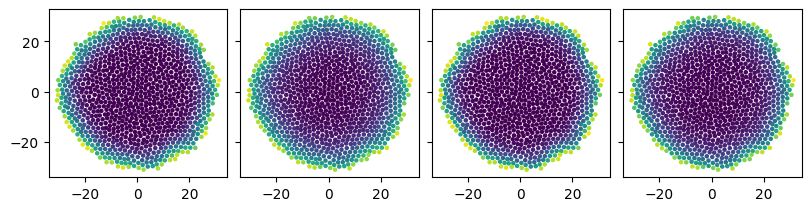

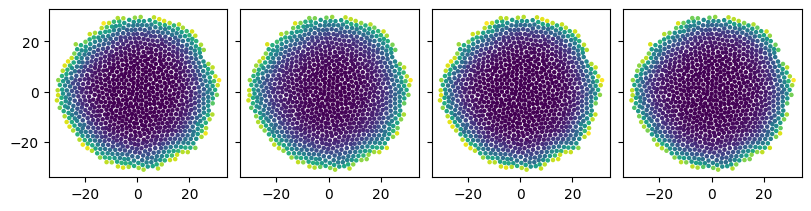

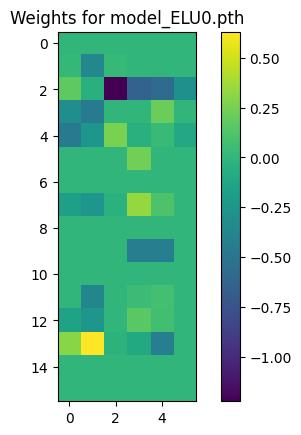

C:\Users\jakob\AppData\Local\Temp\ipykernel_26540\580959254.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  border_mask = torch.tensor(border_mask, requires_grad=True, dtype=torch.float32)
C:\Users\jakob\AppData\Local\Temp\ipykernel_26540\580959254.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs.append(torch.tensor(inp, dtype=torch.float32, requires_grad=True))


Jacobian shape: (2, 5, 1000)
Inputs shape: (3, 1000)


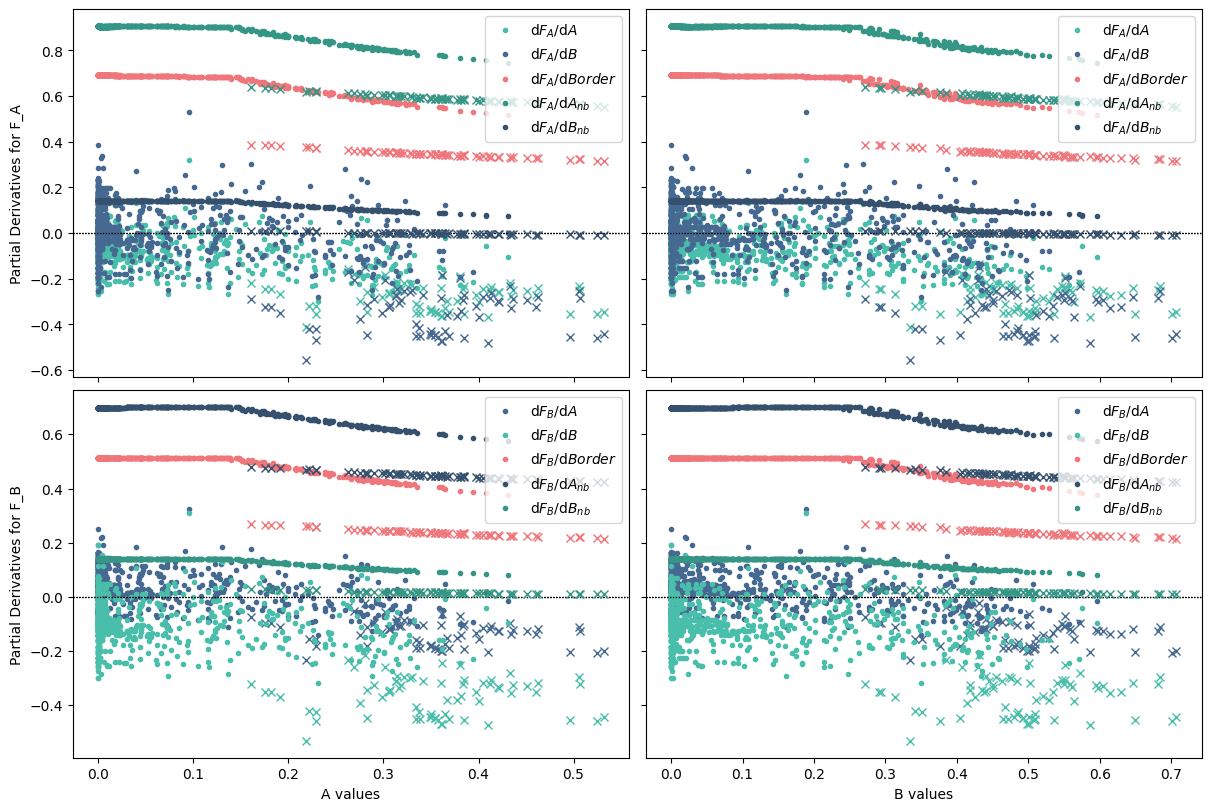

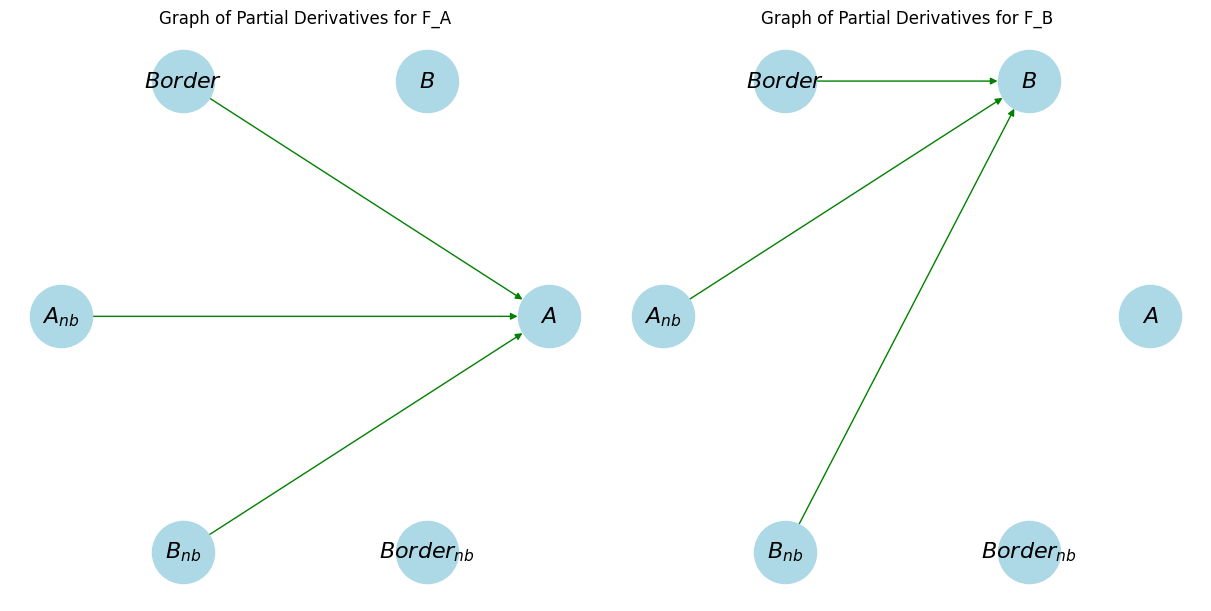

model_ELU1.pth


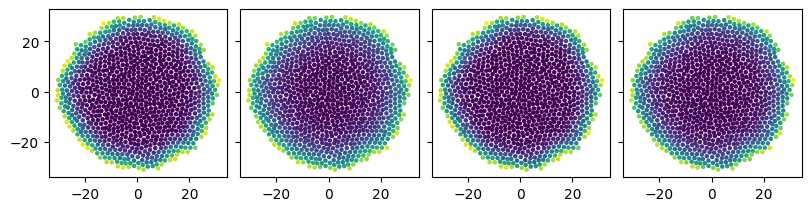

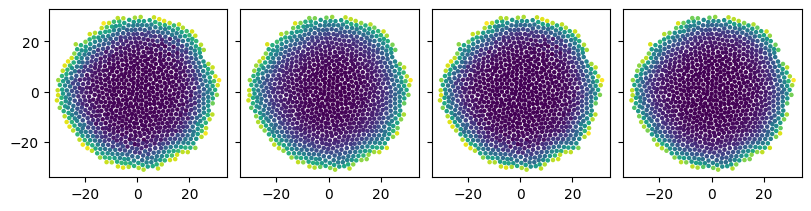

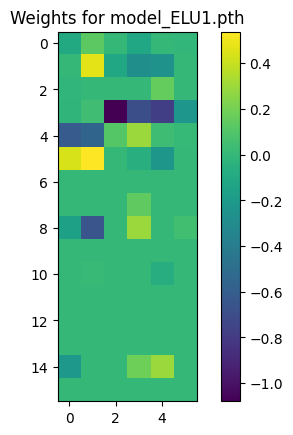

Jacobian shape: (2, 5, 1000)
Inputs shape: (3, 1000)


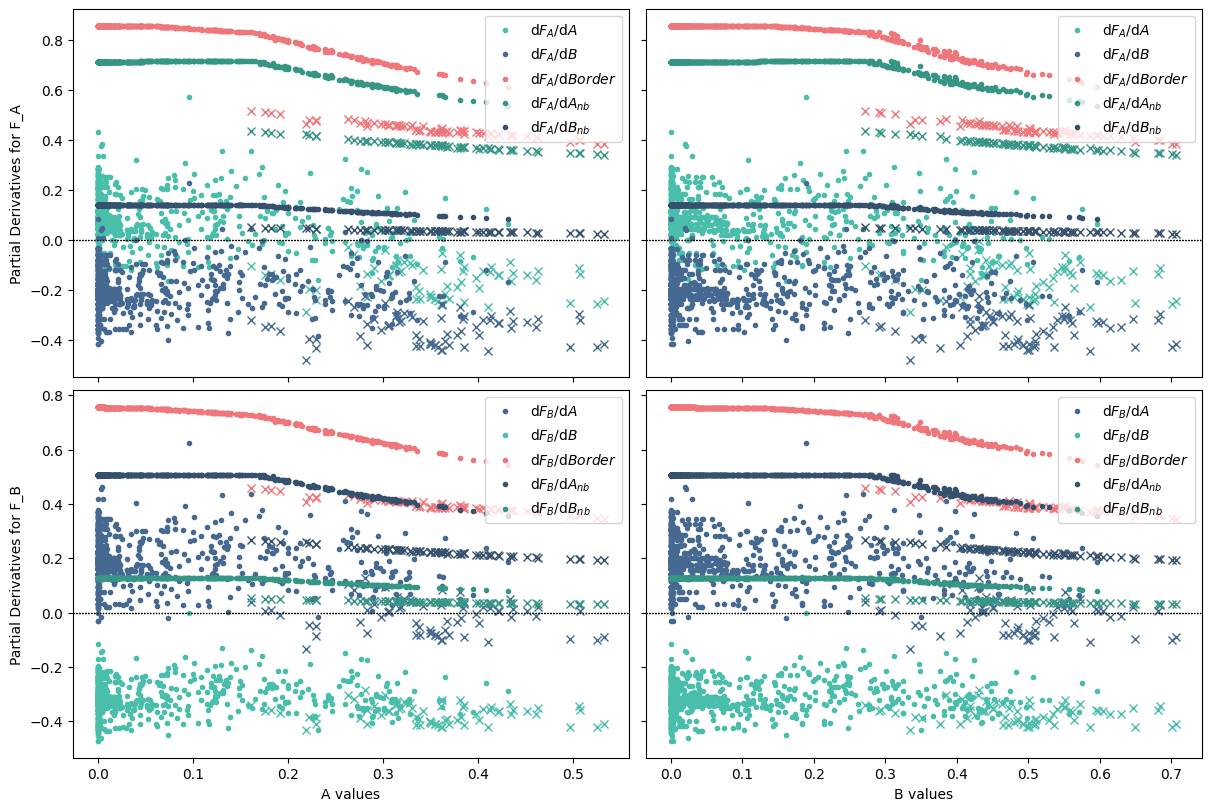

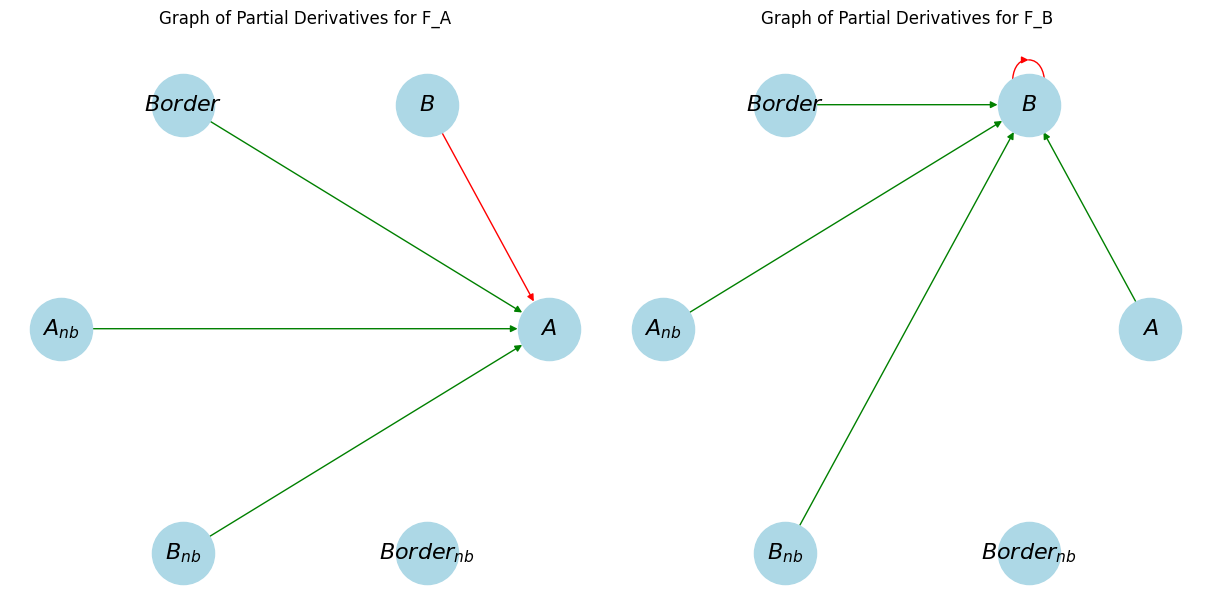

model_ELU2.pth


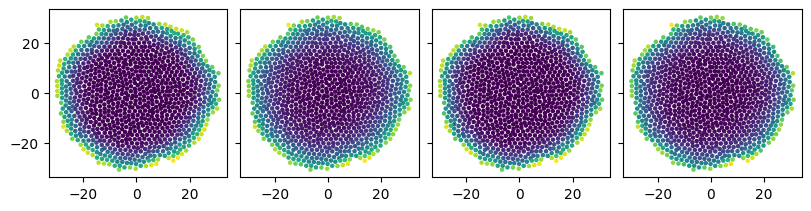

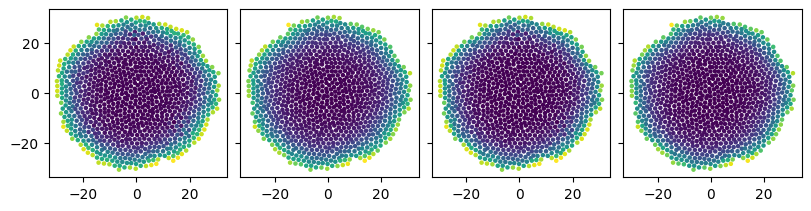

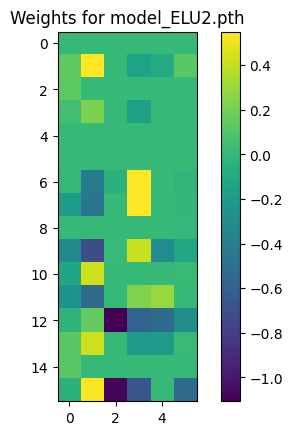

Jacobian shape: (2, 5, 1000)
Inputs shape: (3, 1000)


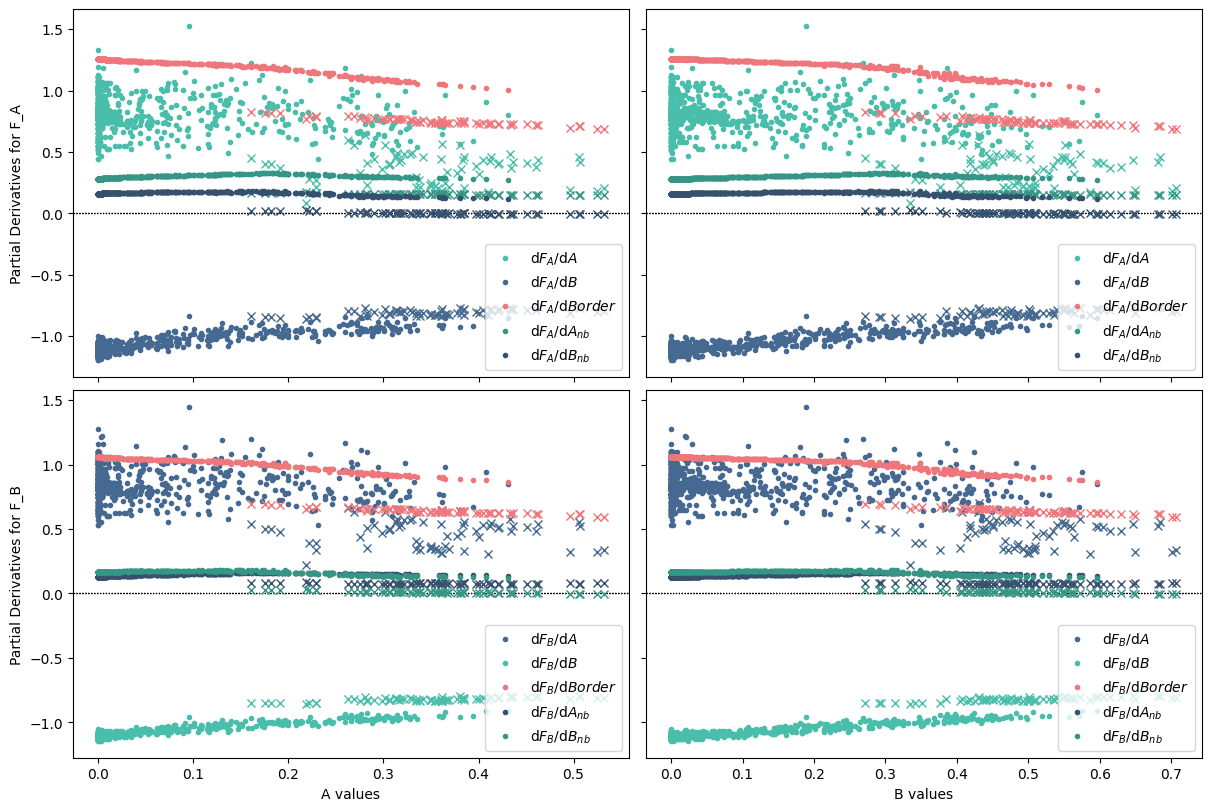

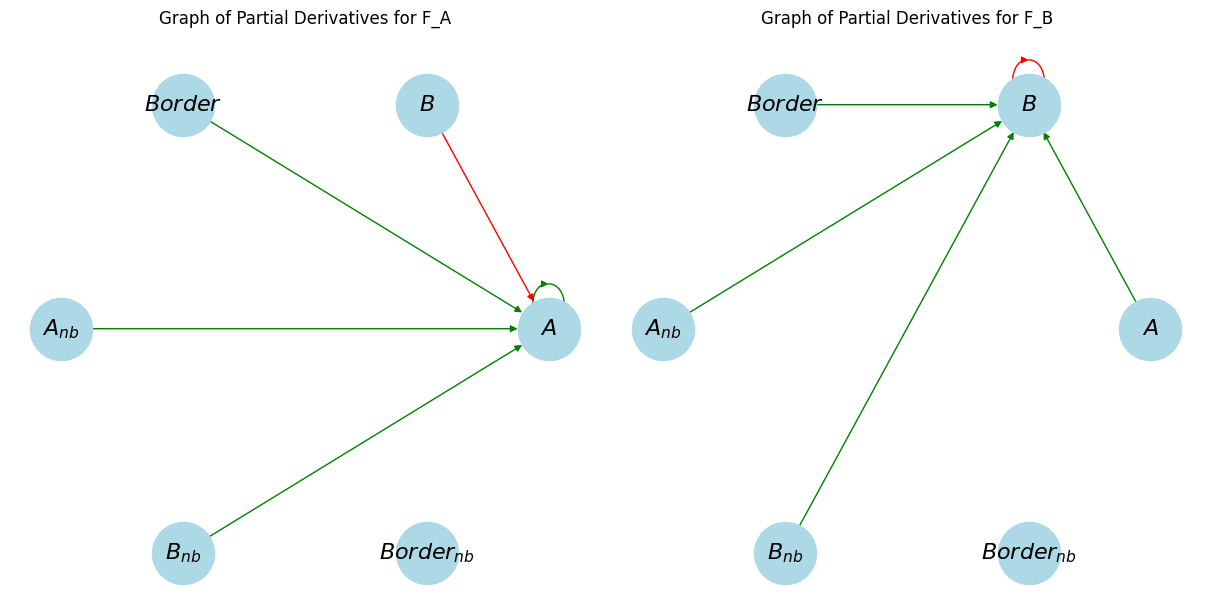

model_ELU3.pth


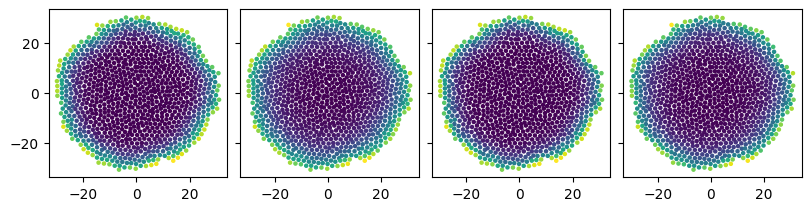

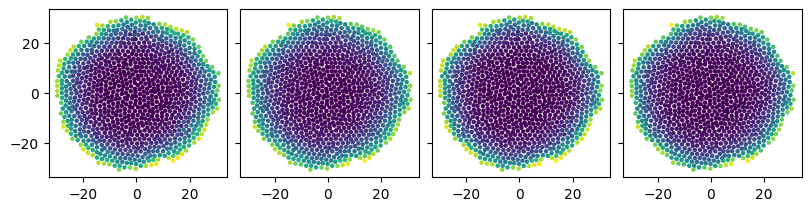

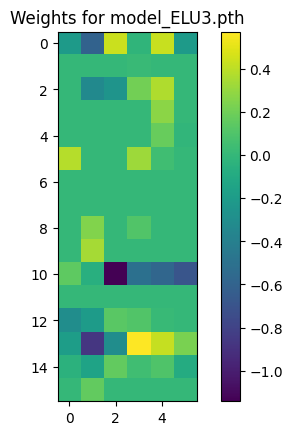

Jacobian shape: (2, 5, 1000)
Inputs shape: (3, 1000)


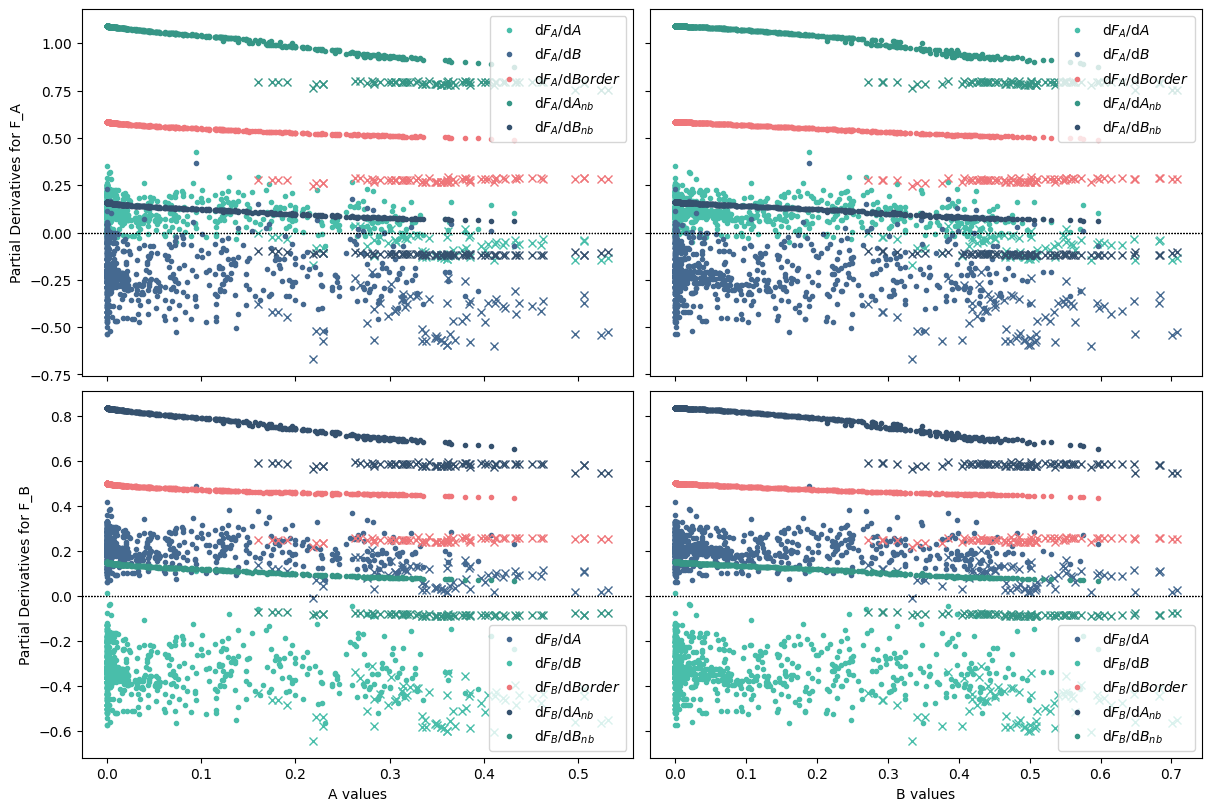

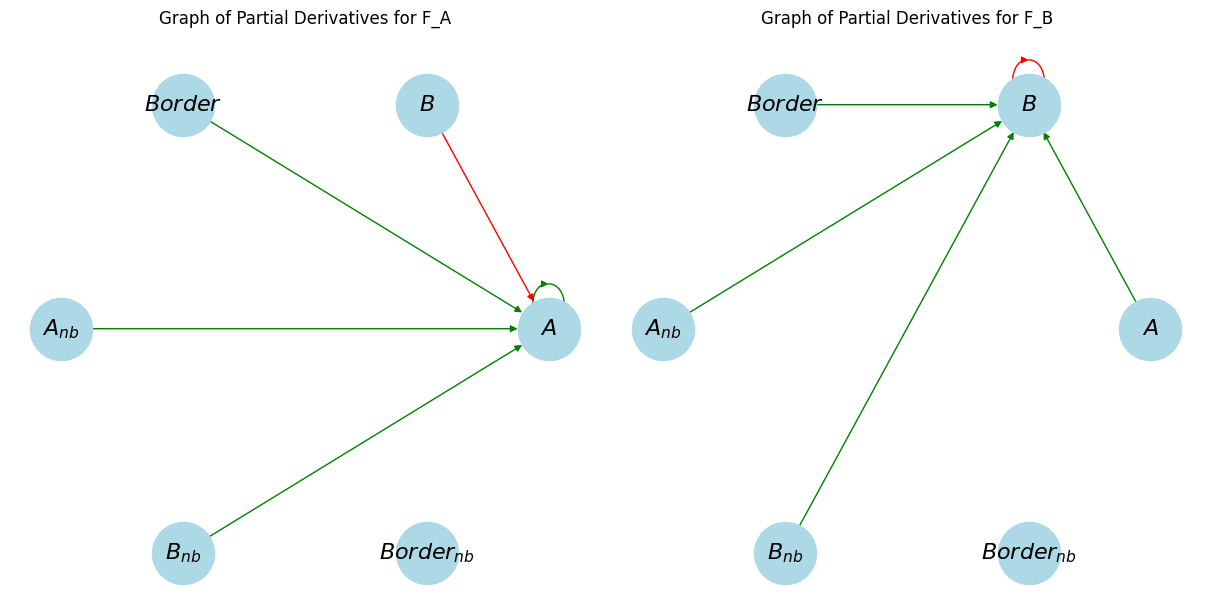

model_ELU4.pth


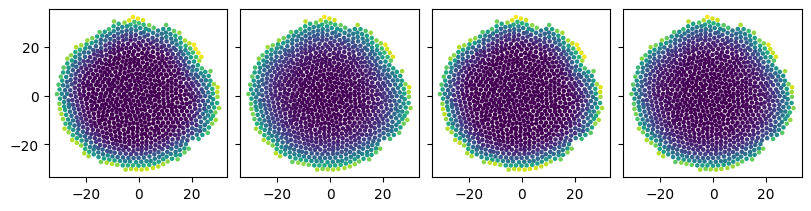

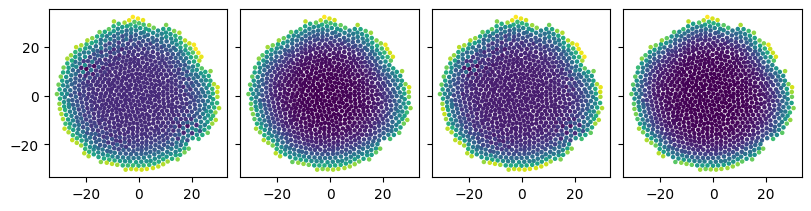

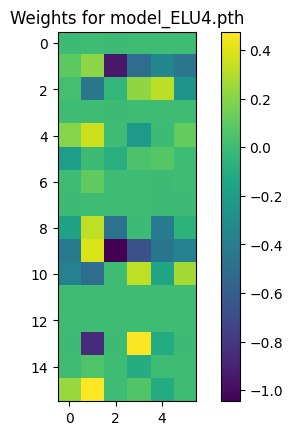

Jacobian shape: (2, 5, 1000)
Inputs shape: (3, 1000)


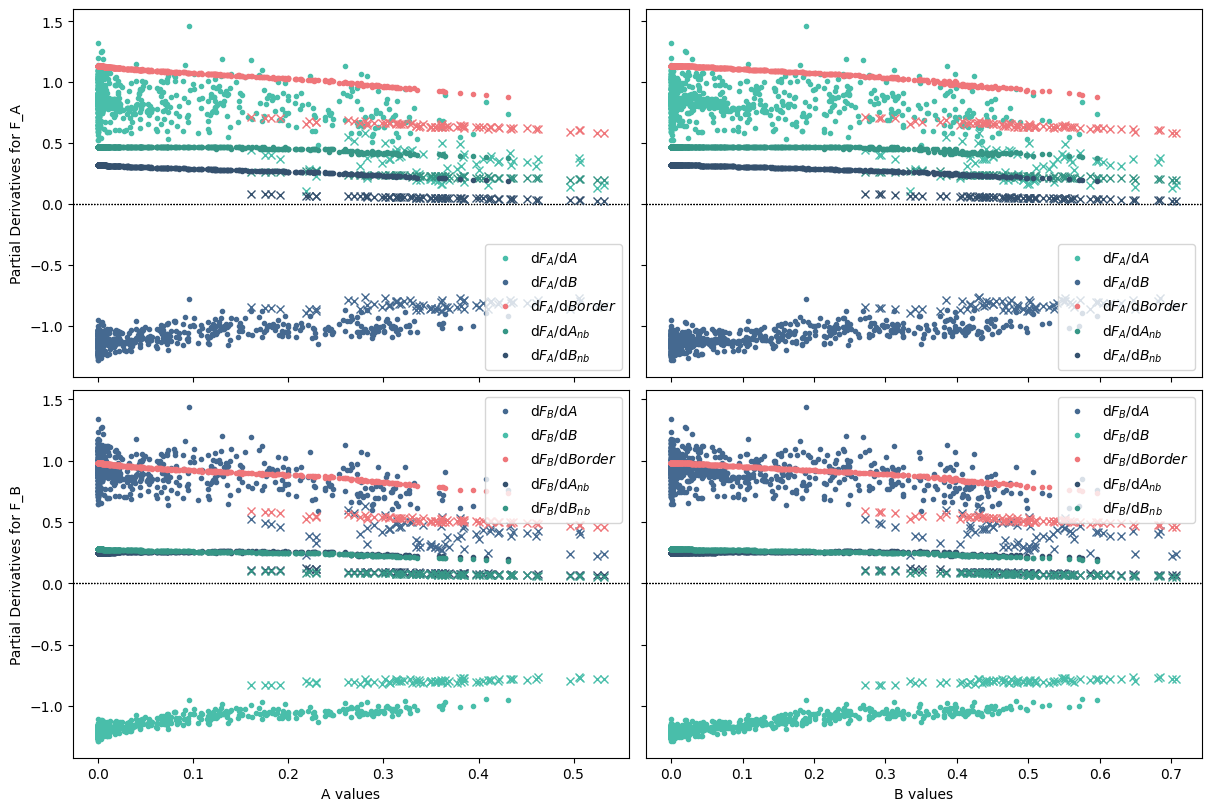

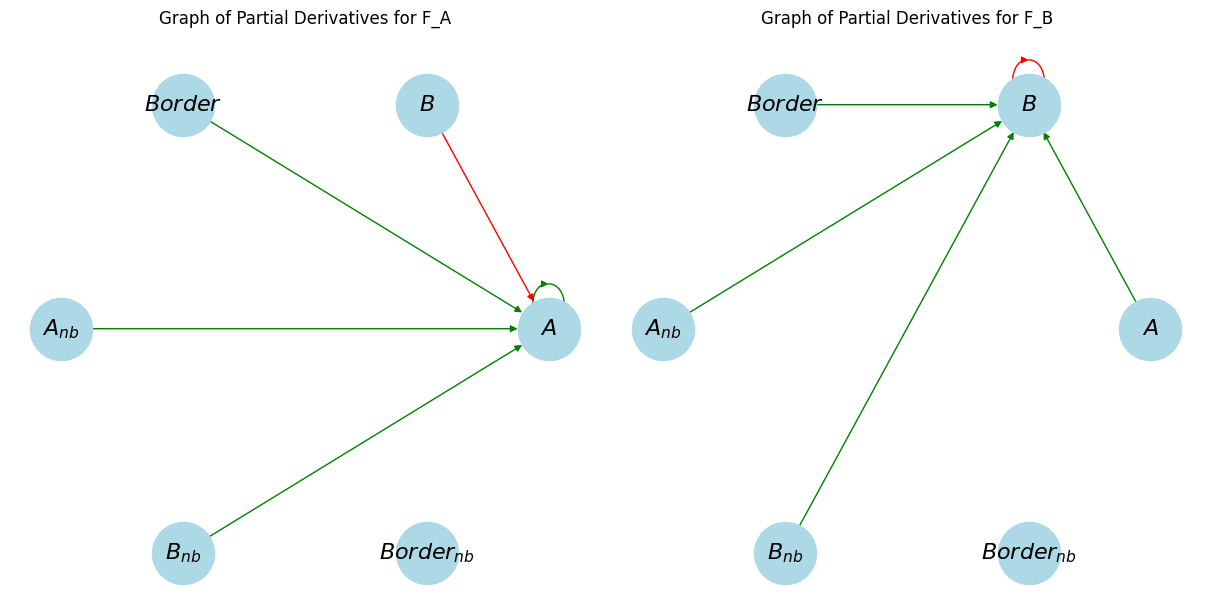

In [78]:
for modelname in os.listdir("models"):
    if "ELU" in modelname:
        print(modelname)
        model = CustomGNN(input_dims=2, hidden_dims=[16], output_dims=2, biases=True, aggregation = "mean")
        model.load_state_dict(torch.load(f"models/{modelname}"))
        env.set_model(model)

        env.test_quality(show = 3, guess_change= True)

        wgts = plt.imshow(model.get_weights()[0].detach())
        plt.colorbar(wgts)
        plt.title(f"Weights for {modelname}")
        plt.show()
        get_jacobian_and_visualize(env, dataset_n = 0, timepoint=0,)

In [ ]:
wts = model.get_weights()

In [ ]:
wts[1].shape

torch.Size([2, 16])

In [ ]:
for hl in model.hidden_layers:
    print(hl.bias.shape)

In [ ]:
model.input_layer.lin_rel.bias

Parameter containing:
tensor([-0.1927, -0.2649, -0.1751,  0.2020, -0.1947,  0.2640,  0.2917,  0.4095,
         0.1146,  0.1264, -0.0287, -0.3622, -0.0201,  0.1114, -0.2453, -0.3290],
       requires_grad=True)

Jacobian shape: (2, 5, 1000)
Inputs shape: (5, 1000)


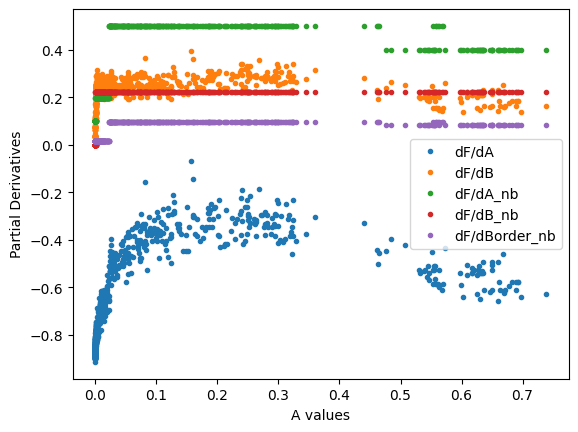

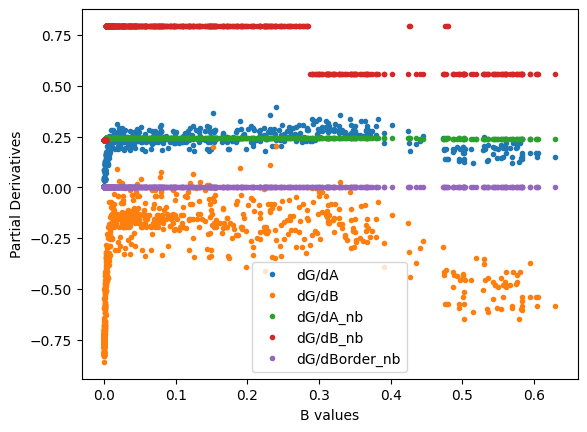

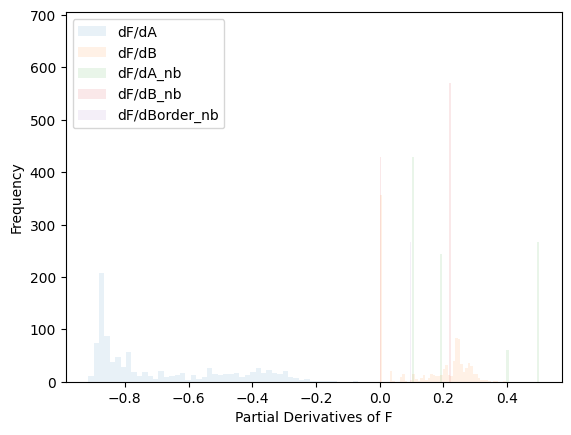

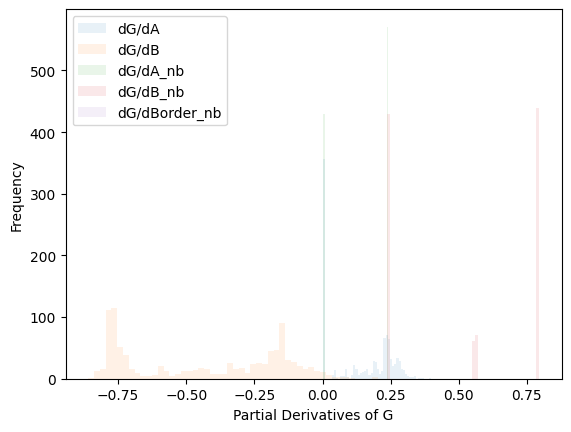

Jacobian shape: (2, 5, 1000)
Inputs shape: (5, 1000)


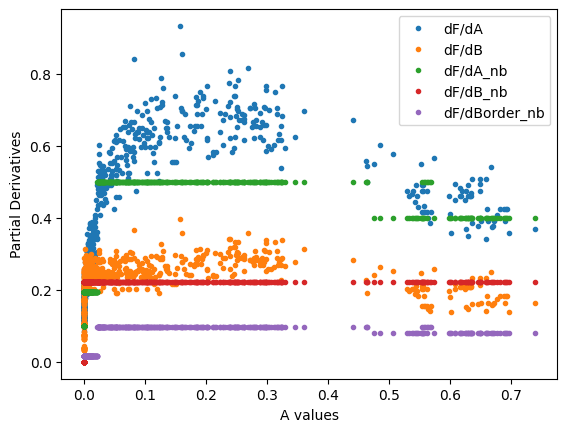

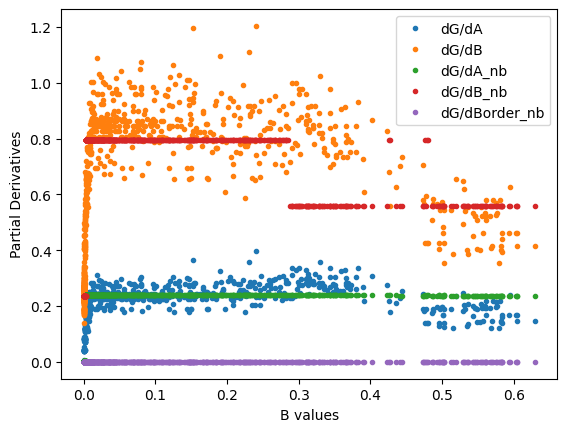

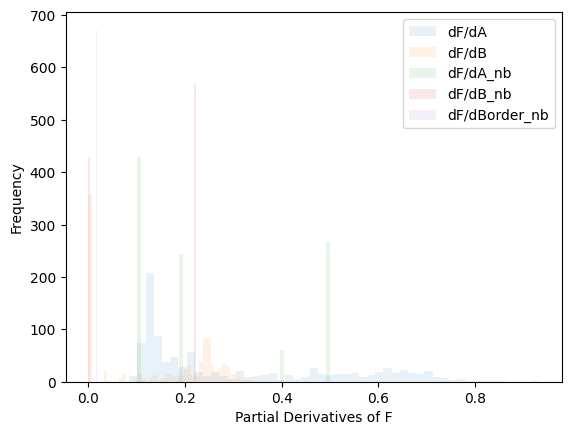

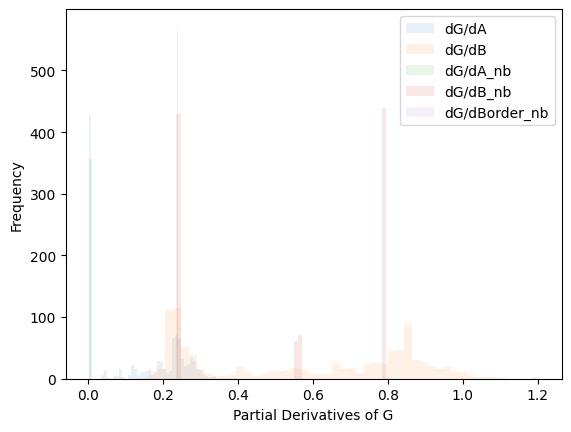

In [ ]:
# Jacobian0, data = get_partial_derivatives(env, dataset_n = 2, timepoint=0)
visualize_Jacobian(Jacobian0, data)
visualize_Jacobian(Jacobian1, data)


torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
Jacobian shape: (2, 5, 1000)
Inputs shape: (5, 1000)


C:\Users\jakob\AppData\Local\Temp\ipykernel_28780\372791219.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs.append(torch.tensor(inp, dtype=torch.float32, requires_grad=True))


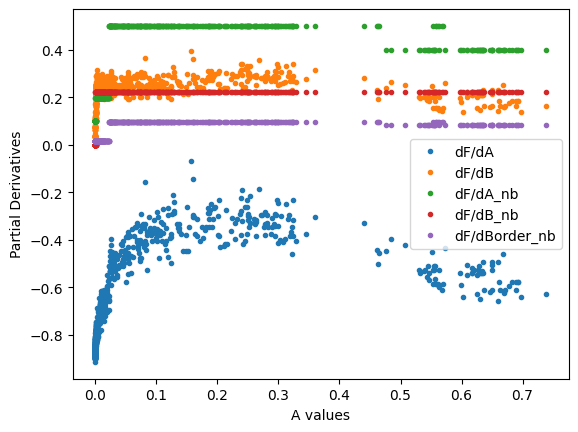

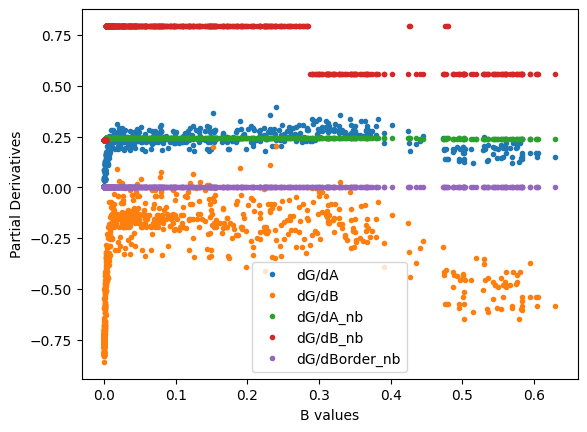

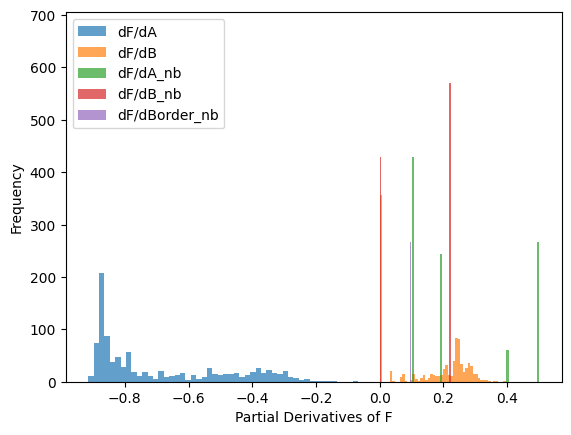

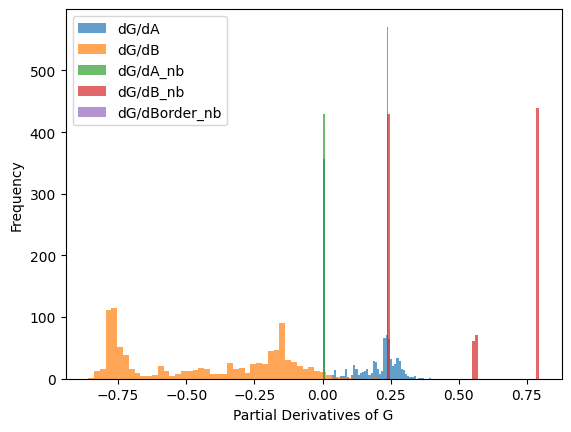

In [ ]:
Jacobian, data = get_partial_derivatives(env, dataset_n = 2, timepoint=0)
visualize_Jacobian(Jacobian, data)

torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
Jacobian shape: (2, 5, 1000)
Inputs shape: (5, 1000)


C:\Users\jakob\AppData\Local\Temp\ipykernel_28780\2275603561.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs.append(torch.tensor(inp, dtype=torch.float32, requires_grad=True))


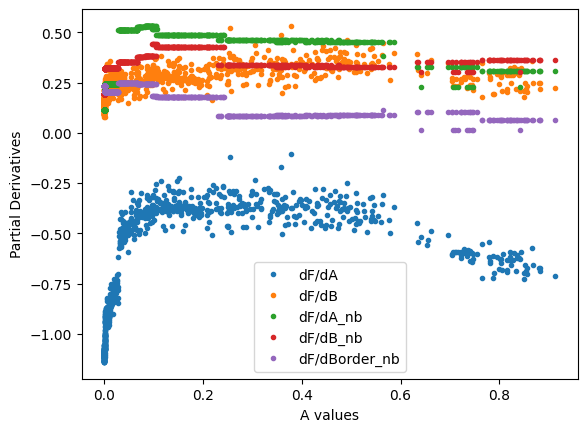

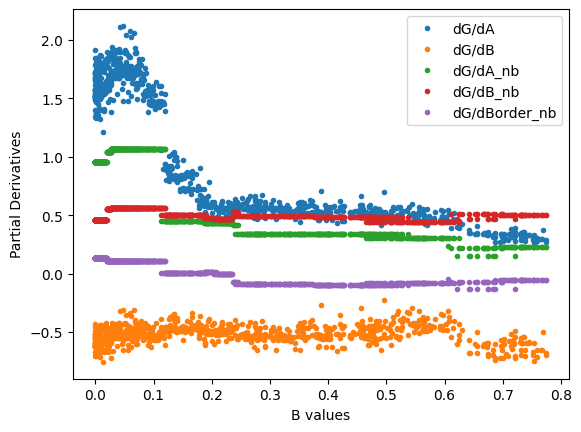

In [ ]:
Jacobian, data = get_partial_derivatives(env, dataset_n = 2, timepoint=2)
visualize_Jacobian(Jacobian, data)

$$\bf{H}(\bf{u})=\begin{bmatrix} A(\bf{u}) \\ B(\bf{u})\end{bmatrix}$$

$$\frac{d\bf{H}(\bf{u})}{dt}=\begin{bmatrix} F(\bf{u}) \\ G(\bf{u})\end{bmatrix}$$

In [ ]:
plt.plot(sample_input_np[:,0], ddAdA, '.', label='dF/dA')
plt.plot(sample_input_np[:,0], ddAdB, '.', label='dF/dB')
plt.xlabel('A')
plt.legend()
plt.show()
plt.plot(sample_input_np[:,1], ddBdA, '.', label='dG/dA')
plt.plot(sample_input_np[:,1], ddBdB, '.', label='dG/dB')
plt.xlabel('B')
plt.legend()
plt.show()



NameError: name 'sample_input_np' is not defined

(array([  1.,   0.,   1.,   2.,   1.,   2.,   5.,   4.,   2.,   6.,   3.,
          5.,   3.,   8.,   3.,  15.,   8.,   8.,  14.,  19.,  27.,  33.,
         33.,  35.,  67.,  37.,  74., 106., 149.,  75.,  55.,  26.,  30.,
         18.,  28.,  35.,  19.,  10.,  12.,   8.,   3.,   2.,   2.,   3.,
          0.,   0.,   0.,   0.,   1.,   2.]),
 array([0.07830019, 0.0833846 , 0.08846901, 0.09355342, 0.09863783,
        0.10372224, 0.10880665, 0.11389107, 0.11897548, 0.12405989,
        0.1291443 , 0.13422871, 0.13931312, 0.14439753, 0.14948194,
        0.15456635, 0.15965076, 0.16473517, 0.16981958, 0.17490399,
        0.1799884 , 0.18507281, 0.19015722, 0.19524163, 0.20032604,
        0.20541045, 0.21049488, 0.21557929, 0.2206637 , 0.22574811,
        0.23083252, 0.23591693, 0.24100134, 0.24608575, 0.25117016,
        0.25625455, 0.26133898, 0.26642337, 0.2715078 , 0.2765922 ,
        0.28167662, 0.28676102, 0.29184544, 0.29692984, 0.30201426,
        0.30709866, 0.31218308, 0.31726748, 0.

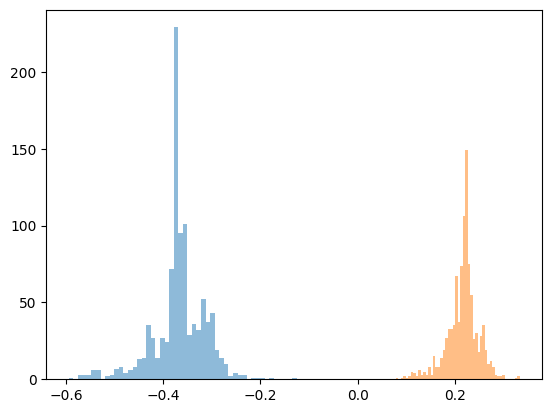

In [ ]:
plt.hist(Jacobian[0][0], bins=50, alpha=0.5, label='dF/dA')
plt.hist(Jacobian[0][1], bins=50, alpha=0.5, label='dF/dB')

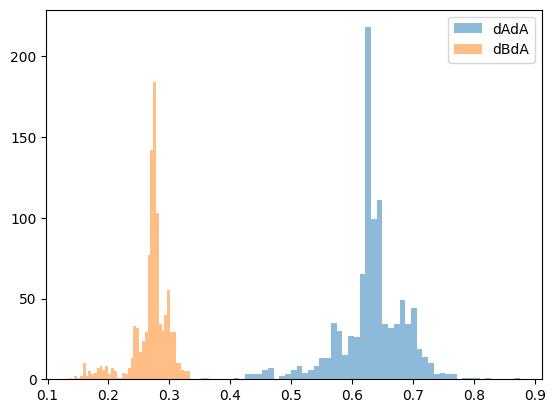

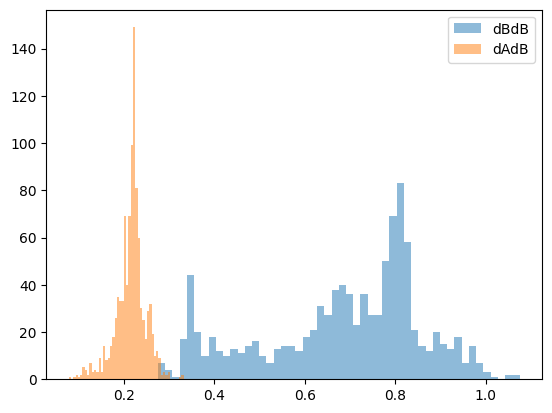

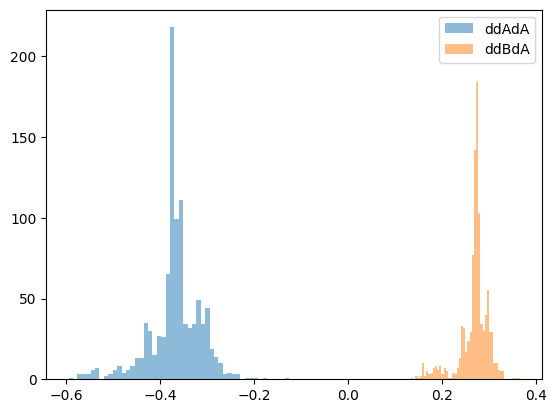

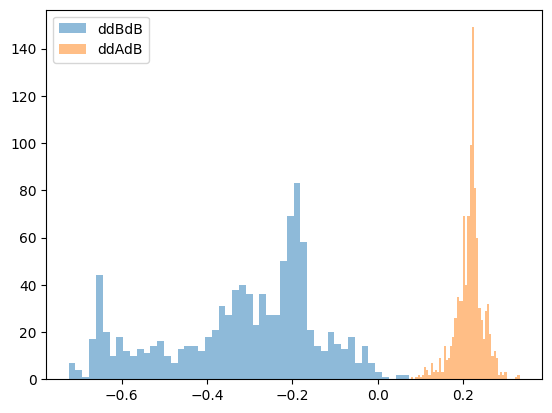

In [ ]:

plt.hist(dAdA, bins=50, alpha=0.5, label='dAdA')
plt.hist(dBdA, bins=50, alpha=0.5, label='dBdA')
plt.legend()
plt.show()
plt.hist(dBdB, bins=50, alpha=0.5, label='dBdB')
plt.hist(dAdB, bins=50, alpha=0.5, label='dAdB')
plt.legend()
plt.show()

plt.hist(ddAdA, bins=50, alpha=0.5, label='ddAdA')
plt.hist(ddBdA, bins=50, alpha=0.5, label='ddBdA')
plt.legend()
plt.show()
plt.hist(ddBdB, bins=50, alpha=0.5, label='ddBdB')
plt.hist(ddAdB, bins=50, alpha=0.5, label='ddAdB')
plt.legend()
plt.show()

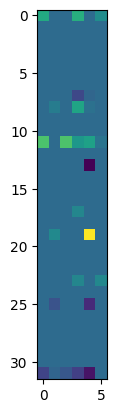

In [ ]:
plt.imshow(model.get_weights()[0].detach())

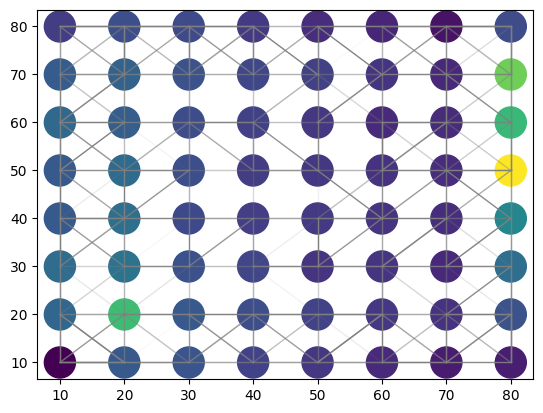

In [ ]:
plt.scatter(coords[:, 0], coords[:, 1], c = output[0,:,0]/10., s = 500)
edge_info = env.edge_info
for i in range(edge_info.shape[1]):
    start_idx = edge_info[0, i].item()
    end_idx = edge_info[1, i].item()
    plt.plot(
        [coords[start_idx, 0], coords[end_idx, 0]],
        [coords[start_idx, 1], coords[end_idx, 1]],
        color='gray', linewidth=1, alpha=np.random.rand(), 
    )
plt.show()